In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['exam1','exam2','output'])
data.head()

,exam1,exam2,output
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


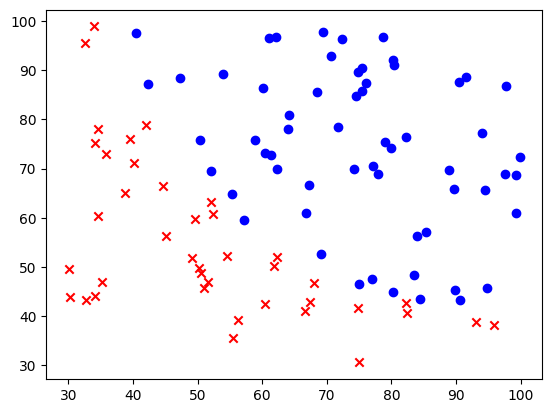

In [3]:
positive = data[data['output'].isin([1])]
negative = data[data['output'].isin([0])]
plt.scatter(positive['exam1'],positive['exam2'],c='b',marker='o')
plt.scatter(negative['exam1'],negative['exam2'],c='r',marker='x')
plt.show()

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

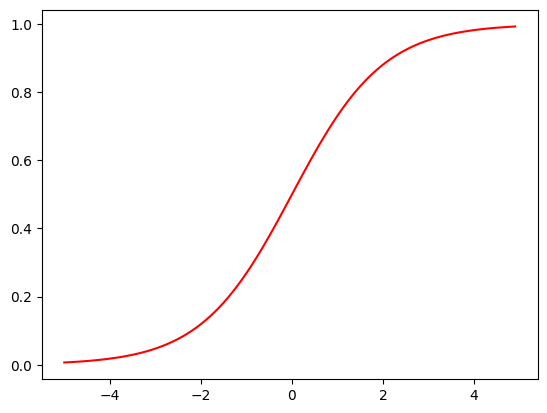

In [5]:
num = np.arange(-5,5,step=0.1)
plt.plot(num,sigmoid(num),c='r')
plt.show()

In [6]:
def Loss(X,Y,w):
    temp_1 = np.multiply(np.log(sigmoid(X.dot(w.T))),Y)
    temp_2 = np.multiply(np.log(1-sigmoid(X.dot(w.T))),(1-Y))
    return -1 * np.mean(temp_1 + temp_2)
    # left = np.multiply(-Y, np.log(sigmoid(X.dot(w.T))))
    # right = np.multiply(1 - Y, np.log(1 - sigmoid(X.dot(w.T))))
    # return np.sum(left - right) / (len(X))


In [7]:
data.insert(0,'b',1)
col = data.shape[1]
X = data.iloc[:,:col-1]
Y = data.iloc[:,col-1:]
X = np.matrix(X)
Y = np.matrix(Y)
w = np.matrix([0,0,0])
w = np.float64(w)
data.head()

,b,exam1,exam2,output
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [8]:
def gradientDescent(X,Y,w,lr,iter):

    cost = np.zeros(iter)
    
    for i in range(iter):

        temp = sigmoid(X.dot(w.T)) - Y

        # for j in range(int(w.shape[1])):

        #     temp_new = np.multiply(temp,X[:,j]) / len(X)
            
        #     w[0,j] = w[0,j] - lr * np.sum(temp_new)  
        temp_new =  X.T.dot(temp)

        w = w - lr / len(X) * temp_new.reshape(1,-1)
        
        cost[i] = Loss(X,Y,w)
        
    return w,cost


In [9]:
w,cost = gradientDescent(X,Y,w,0.001,1000000)

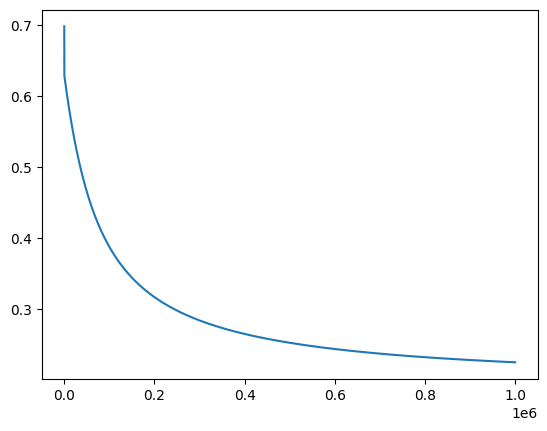

In [10]:
a = np.arange(1000000)
plt.plot(a,cost)
plt.show()


In [11]:
def pred(X,w):
    temp = sigmoid(X.dot(w.T))
    print(temp)
    return [1 if i > 0.5 else 0 for i in temp]

In [12]:
prediction = pred(X,w)
Y = np.array(Y)
res = 0 
for i in range(len(Y)):
    if Y[i]==prediction[i]:
        res+=1
print(prediction)

[[0.19814279]
 [0.00216238]
 [0.1337288 ]
 [0.94759104]
 [0.98147031]
 [0.06208162]
 [0.98611559]
 [0.4823548 ]
 [0.993772  ]
 [0.68267774]
 [0.82946201]
 [0.1165341 ]
 [0.98932345]
 [0.99580656]
 [0.26677232]
 [0.92079484]
 [0.4808509 ]
 [0.27624527]
 [0.99362838]
 [0.57570889]
 [0.18134998]
 [0.98472003]
 [0.05070155]
 [0.00371227]
 [0.95465469]
 [0.76127228]
 [0.59380721]
 [0.78582516]
 [0.21256877]
 [0.07871827]
 [0.80135441]
 [0.92733685]
 [0.27289416]
 [0.44627001]
 [0.17978224]
 [0.11998565]
 [0.74350728]
 [0.93967101]
 [0.32941447]
 [0.14237215]
 [0.90574066]
 [0.04544475]
 [0.9914136 ]
 [0.53601853]
 [0.03785262]
 [0.26151456]
 [0.95832407]
 [0.99957685]
 [0.98809103]
 [0.99926315]
 [0.98095985]
 [0.99190695]
 [0.82241321]
 [0.02739102]
 [0.05491889]
 [0.15318464]
 [0.99617726]
 [0.6205803 ]
 [0.93583701]
 [0.96839622]
 [0.99166458]
 [0.0059978 ]
 [0.03320286]
 [0.00421146]
 [0.17839308]
 [0.13881655]
 [0.85067983]
 [0.06028361]
 [0.99794163]
 [0.65383312]
 [0.00274858]
 [0.91

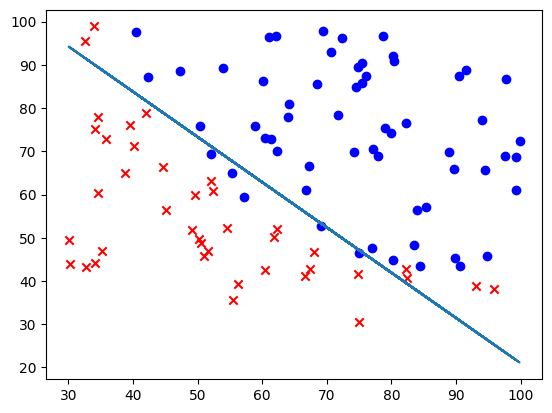

In [13]:
x2 = (-w[0,0] - w[0,1] * X[:,1] ) / w[0,2]
plt.plot(X[:,1],x2)
plt.scatter(positive['exam1'],positive['exam2'],c='b',marker='o')
plt.scatter(negative['exam1'],negative['exam2'],c='r',marker='x')
plt.show()